# Quantidade de artigos RBEF

Os artigos podem ser encontrados nas seguintes urls:

(2001-2022) [SciELO](https://www.scielo.br/j/rbef/grid)

(1979-2001) [SBF](https://www.sbfisica.org.br/rbef/edicoes.shtml)

In [1]:
# Coisas do Jupyter
%load_ext autoreload
%autoreload 2

In [2]:
# Imports
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

## Análise do site da [SBF](https://www.sbfisica.org.br/rbef/edicoes.shtml) (1979-2001)

Notei que se nós fizermos uma busca na barra de pesquisa, com uma String vazia, o site lista todos os artigos publicados de 1979 até 2014, o que é curioso, porque na tabela ele só mostra os atigos até 2001.

Vou comparar a quantidade de artigos pela String vazia e com a quantidade de artigos que encontramos na tabela, para saber se temos as mesmas quantidades em ambos os métodos

### Método da String vazia.

In [3]:
url_base = 'https://www.sbfisica.org.br/rbef/'

In [4]:
req = requests.post('https://www.sbfisica.org.br/rbef/pesquisa.php',
                   data={'txtQuery':'','Busca':'Pesquisar','type':'title'})

In [5]:
site_post = BeautifulSoup(req.text, 'html.parser')

In [6]:
tabela_post = site_post.find(name='table', attrs={'id':'AutoNumber1'})

In [7]:
contador_sbf_post = {}

for item in tabela_post.find_all('table'):
    _, ano_td, artigo_td = item.find_all('td')  # retorna uma lista com 3 elementos.
    
    ano = ano_td.text.split(',')[-1].strip()  # Ano da publicação
    nome = artigo_td.a.text.strip()  # Nome do artigo
    url = url_base + artigo_td.a['href'].strip()  # Url para baixar o artigo
      
    try:  # Tenta adicionar +1 ao contador do ano
        contador_sbf_post[ano] += 1
    except KeyError:  # Se acontecer o KeyError, siginifica que esse ano ainda não faz parte do contador
        contador_sbf_post[ano] = 1  # então eu inicializo ele e adionando 1

Agora se fizermos a busca dos artigos pela tabela principal, a que vai de 1979 até 2001, será que teremos a mesma quantidade de artigos nesse intervalo?

In [8]:
req = requests.get('https://www.sbfisica.org.br/rbef/edicoes.shtml')

In [9]:
site_get = BeautifulSoup(req.text, 'html.parser')

In [10]:
tabela_get = site_get.find(name='table', attrs={'id':'AutoNumber2'})

In [11]:
links = {}

for item in tabela_get.find_all('tr'):
    linha = item.find_all('td')
    
    if len(linha) == 6:  # Número de colunas 
        ano = linha[0].text.strip()
        vol = linha[1].text.strip()  # ainda nao sei oq eu fazer com essa informação do volume.
        
        links[ano] = []
        
        for i in range(2,6):  # do elemento 2 até o elemento 5, são as colunas que possuem link.
            a_tag = linha[i].find('a')
            if a_tag:
                links[ano].append(a_tag['href'])


In [12]:
contador_sbf_get = {}

for key, v in links.items():
    for url in v:
        req = requests.get(url_base + url)
        site = BeautifulSoup(req.text, 'html.parser')
        a_tag = site.find_all('a')
        
        try:  # Tenta adicionar +1 ao contador do ano
            contador_sbf_get[key] += len(a_tag)
        except KeyError:  # Se acontecer o KeyError, siginifica que esse ano ainda não faz parte do contador
            contador_sbf_get[key] = len(a_tag)  # então eu inicializo ele e adionando 1
        

Comparando o resultado dos contadores. Como o contador_sbf_get é menor, vamos utilizá-lo como base

In [13]:
for i, k in enumerate(contador_sbf_get):
    print(f'A quantidade de artigos em {k} é igual? R:', contador_sbf_get[k] == contador_sbf_post[k])

A quantidade de artigos em 2001 é igual? R: True
A quantidade de artigos em 2000 é igual? R: True
A quantidade de artigos em 1999 é igual? R: True
A quantidade de artigos em 1998 é igual? R: True
A quantidade de artigos em 1997 é igual? R: True
A quantidade de artigos em 1996 é igual? R: True
A quantidade de artigos em 1995 é igual? R: True
A quantidade de artigos em 1994 é igual? R: True
A quantidade de artigos em 1993 é igual? R: True
A quantidade de artigos em 1992 é igual? R: True
A quantidade de artigos em 1991 é igual? R: True
A quantidade de artigos em 1990 é igual? R: True
A quantidade de artigos em 1989 é igual? R: True
A quantidade de artigos em 1988 é igual? R: True
A quantidade de artigos em 1987 é igual? R: True
A quantidade de artigos em 1986 é igual? R: True
A quantidade de artigos em 1985 é igual? R: True
A quantidade de artigos em 1984 é igual? R: True
A quantidade de artigos em 1983 é igual? R: True
A quantidade de artigos em 1982 é igual? R: True
A quantidade de arti

Sabendo que pelos dois jeitos temos a mesma quantidade de artigos de 1979 até 2001, podemos escolher de forma arbitrária qual método seguir para fazer download dos artigos.

## Analise do site da SciELO (2001-atualmente)


In [14]:
url_base = 'https://www.scielo.br'

In [15]:
req = requests.get('https://www.scielo.br/j/rbef/grid')

In [16]:
site_scielo = BeautifulSoup(req.text, 'html.parser')

In [17]:
tabela_scielo = site_scielo.find('tbody')

In [18]:
links = {}

for item in tabela_scielo.find_all('tr'):
    td_all = item.find_all('td')  # lista com 2 elementos
    ano = td_all[0].text.strip()  # o ano sempre é o primeiro elemento da lista
    a_td = td_all[1]              # as tag <a> sempre são o segunfo elemento da lista
        
    links[ano] = []
    for linha in a_td.find_all('a'):
        a_tag = linha
        if a_tag:
            links[ano].append(a_tag['href'])
    

In [19]:
contador_scielo_get = {}

for key, v in links.items():
    for url in v:
        req = requests.get(url_base + url)
        site = BeautifulSoup(req.text, 'html.parser')
        tabela = site.find(name='ul', attrs={'class':'articles'})
        li_tag = tabela.find_all("li", {"data-date": True})
        
        try:
            contador_scielo_get[key] += len(li_tag)
        except KeyError:
            contador_scielo_get[key] = len(li_tag) 
        

Com o contador de artigos da Scielo podemos comparar a quantidade de artigos, de 2001 até 2014, no site da SBF e no site da SciELO

In [20]:
for k in range(2001, 2015):
    k = str(k)
    if contador_scielo_get[k] == contador_sbf_post[k]:
        print(f'A quantidade de artigos em {k} é igual? R: True')
    else:
        print(f'A quantidade de artigos em {k} é igual? R: False')
        
        diff = abs(contador_scielo_get[k] -  contador_sbf_post[k])
        if contador_scielo_get[k] > contador_sbf_post[k]:
            print(f'   |___ A SciELO possui {diff} a mais')
        else:
            print(f'   |___ A SBF possui {diff} a mais')

A quantidade de artigos em 2001 é igual? R: False
   |___ A SBF possui 17 a mais
A quantidade de artigos em 2002 é igual? R: False
   |___ A SciELO possui 1 a mais
A quantidade de artigos em 2003 é igual? R: True
A quantidade de artigos em 2004 é igual? R: False
   |___ A SciELO possui 1 a mais
A quantidade de artigos em 2005 é igual? R: True
A quantidade de artigos em 2006 é igual? R: False
   |___ A SciELO possui 1 a mais
A quantidade de artigos em 2007 é igual? R: True
A quantidade de artigos em 2008 é igual? R: True
A quantidade de artigos em 2009 é igual? R: False
   |___ A SBF possui 1 a mais
A quantidade de artigos em 2010 é igual? R: True
A quantidade de artigos em 2011 é igual? R: False
   |___ A SBF possui 1 a mais
A quantidade de artigos em 2012 é igual? R: True
A quantidade de artigos em 2013 é igual? R: True
A quantidade de artigos em 2014 é igual? R: True


## Análise final

Notamos que de 1979 até 2001 podemos utilizar o método que quisermos para fazer download dos artigos, pois os dois retornam a mesma quantidade de artigos.

O problema é quando comparamos o site da SBF e o da SciELO de 2001 até 2014. Notamos que em alguns anos temos mais artigos em um site e mais artigos em outro. O mais notório é o ano de 2001, onde na SBF temos 17 artigos a mais.


In [21]:
print('Quantidade de artigos de 1979 até 2014 (SBF):', sum(contador_sbf_post.values()))

Quantidade de artigos de 1979 até 2014 (SBF): 1697


In [22]:
soma = 0
for i in range(2015,2023):
    i = str(i)
    soma += contador_scielo_get[i]
    
print('Quantidade de artigos de 2015 até 2022 (SciELO):', soma)

Quantidade de artigos de 2015 até 2022 (SciELO): 1063


In [23]:
print('Número total de artigos:', soma+sum(contador_sbf_post.values()))

Número total de artigos: 2760


In [24]:
temp = dict(contador_scielo_get, **contador_sbf_post)
contador = {}

# ordenando esse dicionário
for k in sorted(temp.keys()):
    contador[k] = temp[k]

del contador['2023'] 

In [25]:
sum(contador.values())

2760

E por fim podemos fazer um plot simples para observamos o crescimento na quantidade das publicações ao longo dos anos.

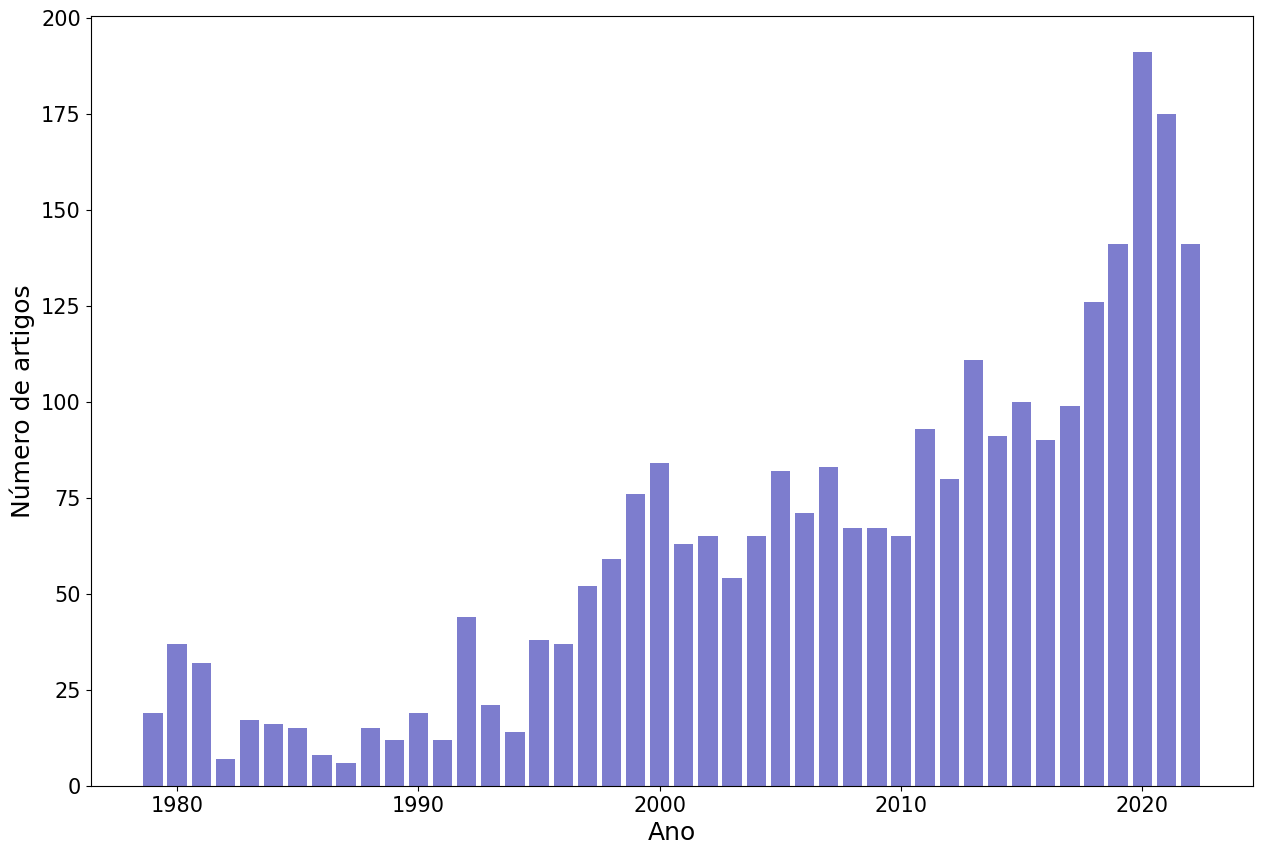

In [27]:
# Plot
fig, ax = plt.subplots(figsize=(15,10))

r = ax.bar(contador.keys(), contador.values(), color='#7d7dce')
ax.set_xticks([1, 11, 21, 31, 41])

ax.tick_params(axis='both', labelsize=15)

ax.set_xlabel('Ano', size='18')
ax.set_ylabel('Número de artigos', size='18')

plt.show()
fig.savefig('quantidade_de_artigos.png', dpi=250, bbox_inches='tight')